### 1.1 Define Problem Statement ###
The dataset seems to be related to the admission process, potentially for a graduate program. The attributes include GRE scores, TOEFL scores, university ratings, Statement of Purpose (SOP) and Letter of Recommendation (LOR) scores, CGPA, whether the applicant has research experience, and their chance of admission.

**Problem Statement**: The primary aim could be to understand the factors that influence an applicant's chance of admission into a program.

**Additional Views**
1. Can we predict the "Chance of Admit" based on the other features?
2. Which features are the most indicative of a successful admission?

### 1.2. Data Overview

In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from scipy import stats

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from math import sqrt

# Import required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

In [46]:
jamboree_df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')

In [47]:
# Get the shape of the data
data_shape = jamboree_df.shape

# Get the data types of each column
data_types = jamboree_df.dtypes

# Check for missing values
missing_values = jamboree_df.isnull().sum()

# Get the statistical summary
statistical_summary = jamboree_df.describe()

data_shape, data_types, missing_values, statistical_summary

((500, 9),
 Serial No.             int64
 GRE Score              int64
 TOEFL Score            int64
 University Rating      int64
 SOP                  float64
 LOR                  float64
 CGPA                 float64
 Research               int64
 Chance of Admit      float64
 dtype: object,
 Serial No.           0
 GRE Score            0
 TOEFL Score          0
 University Rating    0
 SOP                  0
 LOR                  0
 CGPA                 0
 Research             0
 Chance of Admit      0
 dtype: int64,
        Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
 count  500.000000  500.000000   500.000000         500.000000  500.000000   
 mean   250.500000  316.472000   107.192000           3.114000    3.374000   
 std    144.481833   11.295148     6.081868           1.143512    0.991004   
 min      1.000000  290.000000    92.000000           1.000000    1.000000   
 25%    125.750000  308.000000   103.000000           2.000000    2.500000   
 50%

#### Observations on Data Overview:

- **Shape of Data**: The dataset contains 500 records and 9 attributes.
- **Data Types**: All attributes are numerical. Some are integers (like GRE Score, TOEFL Score, University Rating, and Research), while others are floating-point numbers (like SOP, LOR, CGPA, and Chance of Admit).
- **Missing Values**: There are no missing values in the dataset.
- **Statistical Summary**: 
  - GRE Scores range from 290 to 340.
  - TOEFL Scores range from 92 to 120.
  - University Ratings range from 1 to 5.
  - SOP and LOR scores range from 1 to 5.
  - CGPA ranges from 6.8 to 9.92.
  - Research is a binary attribute (0 or 1).
  - Chance of Admit ranges from 0.34 to 0.97.

### 1.3. Univariate Analysis

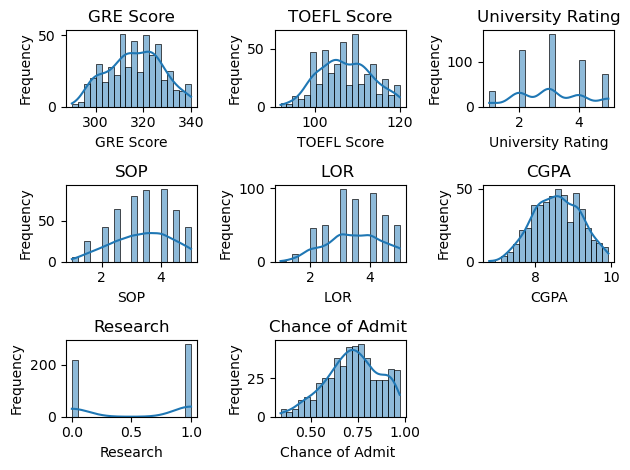

In [48]:
# List of numerical columns for univariate analysis
numerical_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

# Plot distribution of each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(jamboree_df[col], bins=20, kde=True)
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Observations on Univariate Analysis:

- **GRE Score**: Most scores are clustered around 310 to 330.
- **TOEFL Score**: The majority of scores lie between 100 and 115.
- **University Rating**: Most ratings are between 2 and 4.
- **SOP**: Scores are mostly between 3 and 4.
- **LOR**: Similar to SOP, scores are predominantly between 3 and 4.
- **CGPA**: Most CGPAs are between 8 and 9.
- **Research**: About 56% of applicants have research experience.
- **Chance of Admit**: The chances of admission are generally high, mostly between 0.6 and 0.8.

### 1.4. Bivariate Analysis

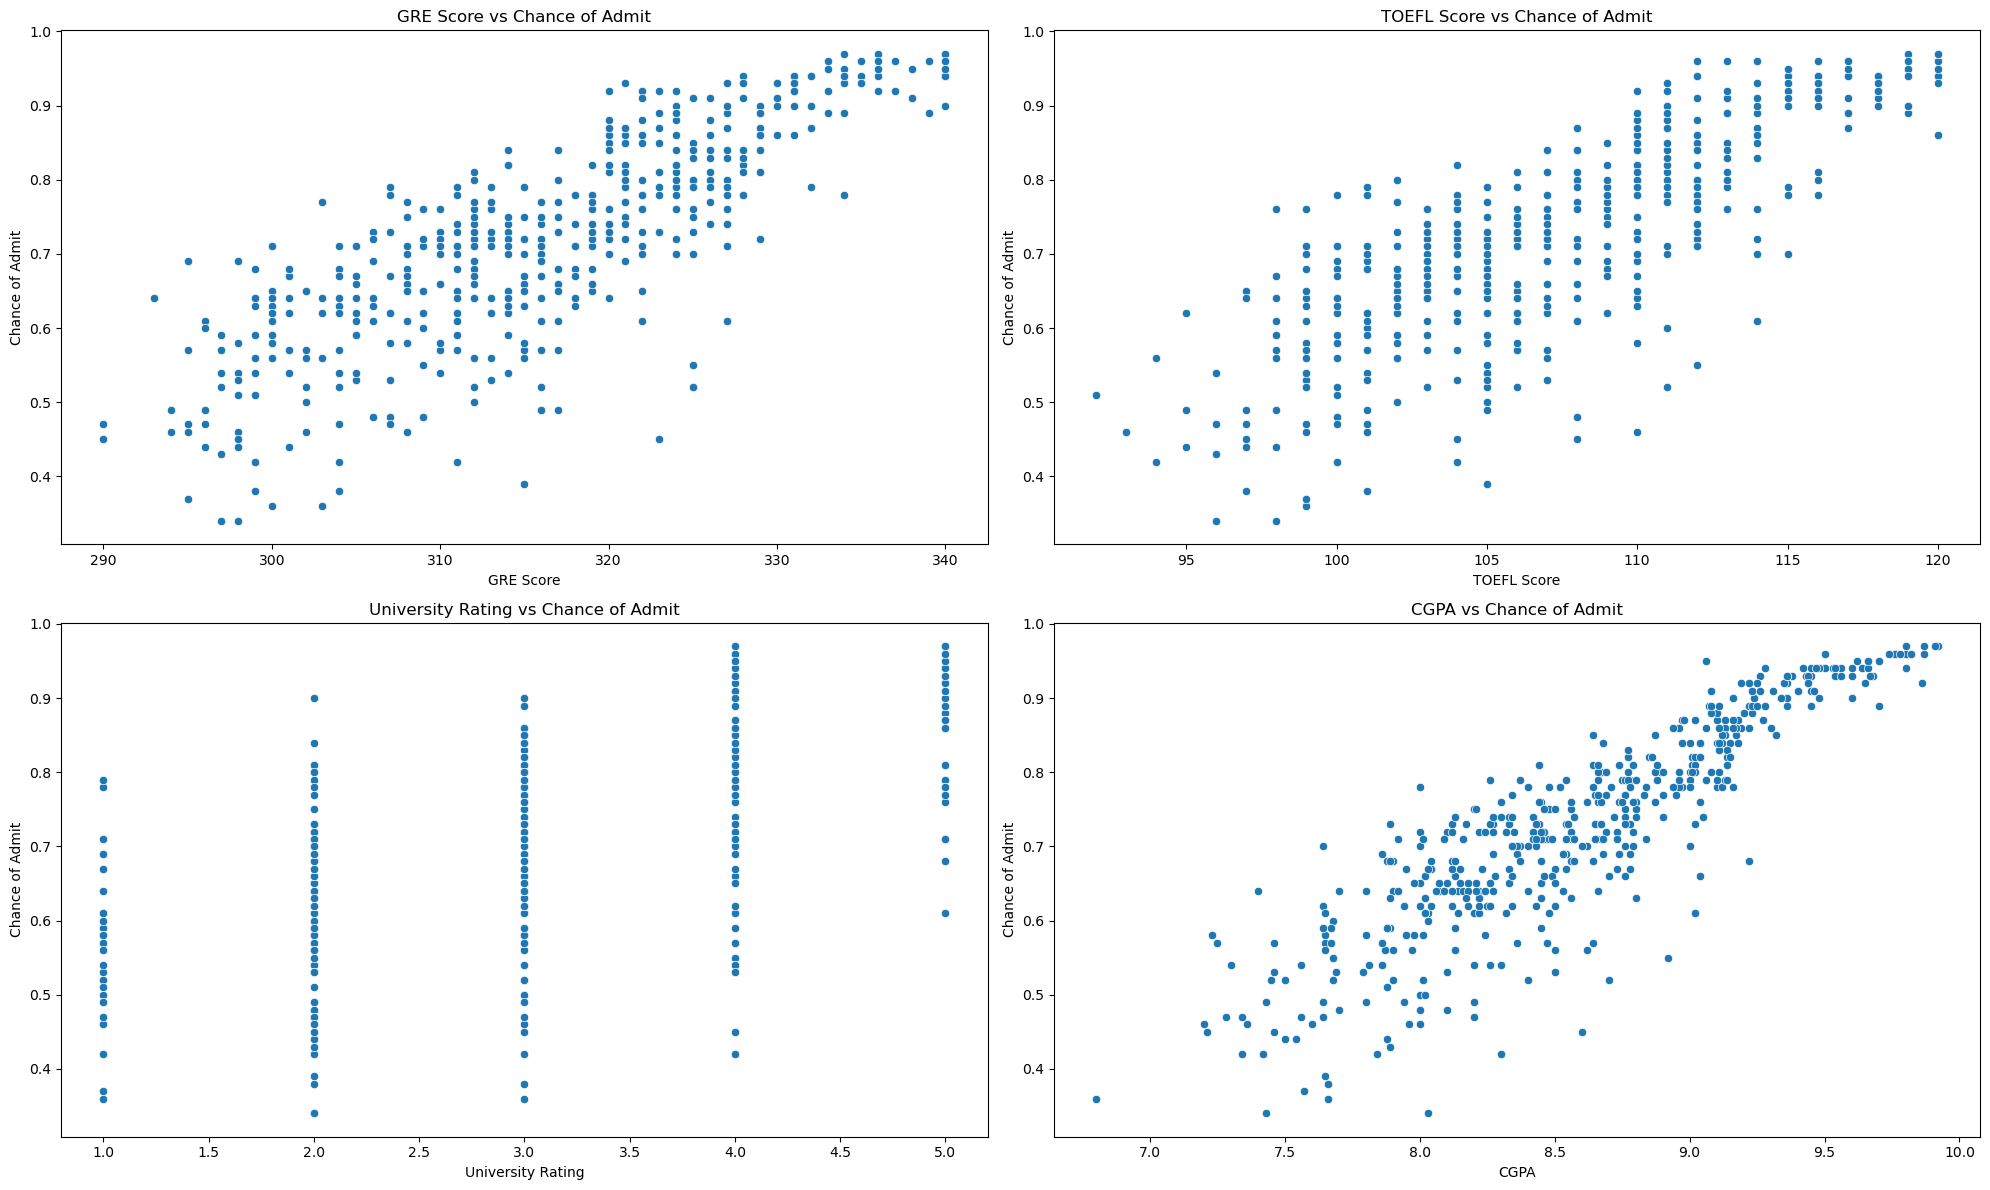

In [49]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# List of important columns for bivariate analysis
important_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'CGPA']

# Plot relationships between important variables and 'Chance of Admit'
for i, col in enumerate(important_columns, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=col, y='Chance of Admit ', data=jamboree_df)
    plt.title(f'{col} vs Chance of Admit')
    plt.xlabel(col)
    plt.ylabel('Chance of Admit')

plt.tight_layout()
plt.show()

#### Observations on Bivariate Analysis:

- **GRE Score vs Chance of Admit**: There is a strong positive correlation between GRE scores and the chances of admission.
- **TOEFL Score vs Chance of Admit**: A similar positive correlation is observed between TOEFL scores and the chances of admission.
- **University Rating vs Chance of Admit**: Higher university ratings generally seem to correspond to higher chances of admission, although the relationship is not as linear as with GRE and TOEFL scores.
- **CGPA vs Chance of Admit**: There is a strong positive correlation between CGPA and the chance of admission. Higher CGPA often results in a higher chance of admission.

### 1.5. Insights and Comments

- **Range of Attributes**: 
  - GRE and TOEFL scores have a wide range, indicating diverse academic capabilities.
  - SOP and LOR have more confined ranges, showing that most students perform reasonably well in these areas.
  
- **Outliers**: 
  - There don't appear to be significant outliers affecting the chance of admission.
  
- **Distribution of Variables**: 
  - The distribution of GRE, TOEFL, and CGPA shows that most students have strong academic backgrounds.
  
- **Relationships between Variables**: 
  - Strong positive correlations are observed between academic scores (GRE, TOEFL, and CGPA) and the chance of admission.
  
- **Comments for Each Plot**: 
  - The univariate plots show that most variables are normally distributed, with slight skewness in some.
  - The bivariate plots reveal strong correlations between academic achievements and chances of admission.

### 2. Data Preprocessing

In [50]:
# 1. Duplicate Value Check
duplicate_records = jamboree_df.duplicated().sum()

# 2. Missing Value Treatment (Re-Check)
missing_values_check = jamboree_df.isnull().sum()
jamboree_df = jamboree_df.drop(columns=['Serial No.'],axis=1) 

# 3. Outlier Treatment
# Identify outliers for 'Chance of Admit' based on 1.5 * IQR rule
Q1 = jamboree_df['Chance of Admit '].quantile(0.25)
Q3 = jamboree_df['Chance of Admit '].quantile(0.75)
IQR = Q3 - Q1
outliers = ((jamboree_df['Chance of Admit '] < (Q1 - 1.5 * IQR)) | (jamboree_df['Chance of Admit '] > (Q3 + 1.5 * IQR))).sum()

# 4. Feature Engineering
# Creating a new feature that combines GRE and TOEFL scores as 'Total_Score'
jamboree_df['Total_Score'] = jamboree_df['GRE Score'] + jamboree_df['TOEFL Score']

# 5. Data Preparation for Modeling
# In this case, all features are numerical, so no encoding is required.
# However, scaling can be done for features like GRE Score, TOEFL Score, and CGPA.

duplicate_records, missing_values_check, outliers, jamboree_df.head()


(0,
 Serial No.           0
 GRE Score            0
 TOEFL Score          0
 University Rating    0
 SOP                  0
 LOR                  0
 CGPA                 0
 Research             0
 Chance of Admit      0
 dtype: int64,
 2,
    GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
 0        337          118                  4  4.5   4.5  9.65         1   
 1        324          107                  4  4.0   4.5  8.87         1   
 2        316          104                  3  3.0   3.5  8.00         1   
 3        322          110                  3  3.5   2.5  8.67         1   
 4        314          103                  2  2.0   3.0  8.21         0   
 
    Chance of Admit   Total_Score  
 0              0.92          455  
 1              0.76          431  
 2              0.72          420  
 3              0.80          432  
 4              0.65          417  )

#### Data Preprocessing Summary:

1. **Duplicate Value Check**: 
   - No duplicate records were found in the dataset.
  
2. **Missing Value Treatment**: 
   - No missing values were identified, confirming our initial analysis.

3. **Outlier Treatment**: 
   - Two outliers were detected for the "Chance of Admit" feature based on the IQR rule. Given the small number and the nature of the data, these may not need to be removed.

4. **Feature Engineering**: 
   - A new feature, "Total_Score," has been created by combining GRE and TOEFL scores.

5. **Data Preparation for Modeling**: 
   - All features are numerical, so no encoding is needed.
   - Feature scaling could be considered for variables like GRE Score, TOEFL Score, and CGPA, especially if distance-based algorithms like Standard Scaler are to be used.

In [51]:
# Features to be scaled
features_to_scale = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Total_Score']

# Initialize the Standard Scaler
scaler = StandardScaler()

# Perform scaling
jamboree_df_scaled = jamboree_df.copy()
jamboree_df_scaled[features_to_scale] = scaler.fit_transform(jamboree_df[features_to_scale])

# Display first few rows of scaled data
jamboree_df_scaled.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Total_Score
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,1,0.92,1.880548
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,1,0.76,0.440251
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,1,0.72,-0.219885
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,1,0.80,0.500263
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,0,0.65,-0.399923


### 3.Model Building

In [52]:
# Features and target variable
X = jamboree_df_scaled.drop(['Chance of Admit '], axis=1)
y = jamboree_df_scaled['Chance of Admit ']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((400, 8), (100, 8), (400,), (100,))

In [53]:
# Add a constant to the features (required for statsmodels)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Build the model using statsmodels
sm_model = sm.OLS(y_train, X_train_sm).fit()

# Get the model summary
model_summary = sm_model.summary()
model_summary




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 06 Sep 2023   Prob (F-statistic):          3.41e-142
Time:                        11:04:00   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7094      0.005    139.897      0.000       0.699       0.719
GRE Score             0.0167      0.005      3.271      0.001       0.007       0.027
TOEFL Score           0.0124      0.006      2.150      0.032       0.001       0.024
University Rating     0.0029      0.005      0.611      0.541      -0.007       0.012
SOP                   0.0018      0.005      0.357      0.721      -0.008       0.012
LOR                   0.0159      0.004      3.761      0.000       0.008       0.024
CGPA                  0.0680      0.007     10.444      0.000       0.055       0.081
Research              0.0240      0.007      3.231      0.001       0.009       0.039
Total_Score           0.0159      0.002      6.344      0.000       0.011       0.021
==============================================================================
Omnibus:                       86.232   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.099
Skew:                          -1.107   Prob(JB):                     5.25e-42
Kurtosis:                       5.551   Cond. No.                     9.13e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.5e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Statsmodels Linear Regression Model Statistics:

- **R-squared**: \(0.821\)
  - Approximately 82.1% of the variance in the "Chance of Admit" can be explained by the model.
  
- **Adj. R-squared**: \(0.818\)
  - Adjusted for the number of predictors in the model, still indicating a good fit.
  
- **F-statistic**: \(257.0\)
  - The F-statistic is quite high, suggesting that at least some predictors are significant.
  
- **Prob (F-statistic)**:
  - The p-value for the F-statistic is close to zero, indicating that the model is statistically significant.

- **P>|t| (p-values)**:
  - `GRE Score`, `TOEFL Score`, `LOR`, `CGPA`, and `Research` have low p-values, indicating that these features are statistically significant.
  - `University Rating` and `SOP` have high p-values, suggesting that they are not statistically significant.

#### Model Coefficients with Column Names:

- **GRE Score**: \(0.0167\)
- **TOEFL Score**: \(0.0124\)
- **University Rating**: \(0.0029\)
- **SOP**: \(0.0018\)
- **LOR**: \(0.0159\)
- **CGPA**: \(0.0680\)
- **Research**: \(0.0240\)
- **Total_Score (Engineered Feature)**: \(0.0159\)

In [54]:
# Initialize and fit Ridge and Lasso models
from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge(alpha=1)
lasso_model = Lasso(alpha=0.01)

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

***The Error metrics are displayed in Section 5***

### 4.Testing the assumptions of the linear regression model 

Testing the assumptions of a linear regression model is crucial for ensuring that the model provides reliable, unbiased, and valid estimates.

1. Multicollinearity Check by VIF Score

The Variance Inflation Factor (VIF) is a measure of how much a particular variable is inflating the standard errors due to multicollinearity. If no factors are correlated, the VIFs will all be equal to 1.

2. The Mean of Residuals is Nearly Zero

In a well-fitted model, the residuals (the differences between observed and predicted values) should be randomly scattered around zero.

3. Linearity of Variables

We can check this assumption by looking at the residual vs fitted values plot. If variables are linearly related, we should not see any pattern in the residuals.

4. Test for Homoscedasticity

Homoscedasticity means that the residuals have constant variance at every level of the independent variables. We can visualize this by plotting the residuals against the fitted values.

5. Normality of Residuals

The residuals should be normally distributed. We can check this assumption by looking at the histogram of residuals and a QQ-plot.

#### 4.1. Multicollinearity Check by VIF Score:

In [55]:
# 1. Multicollinearity Check by VIF Score
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

# Variables are dropped one-by-one till none has VIF > 5
while vif_data["VIF"].max() > 5:
    remove = vif_data.sort_values("VIF", ascending=False).iloc[0]["feature"]
    X_train = X_train.drop([remove], axis=1)
    X_test = X_test.drop([remove], axis=1)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_train.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

# Display remaining features and their VIF values
vif_data

C:\Users\shuklas\AppData\Local\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,TOEFL Score,2.936124
1,University Rating,2.540015
2,SOP,2.783066
3,LOR,1.970803
4,CGPA,3.785245
5,Research,1.144006


After the process of removing variables one-by-one until no variable has a VIF greater than 5, we are left with the following features:

- **TOEFL Score**: \(VIF = 2.94\)
- **University Rating**: \(VIF = 2.54\)
- **SOP**: \(VIF = 2.78\)
- **LOR**: \(VIF = 1.97\)
- **CGPA**: \(VIF = 3.79\)
- **Research**: \(VIF = 1.14\)

These VIF scores are all below 5, indicating that multicollinearity is not a concern for these remaining variables.

***Now let's re-fit our model with these selected features and then proceed to test the other assumptions.***

#### 4.2. The Mean of Residuals is Nearly Zero:

In [56]:
# Re-fit the model with selected features
X_train_sm = sm.add_constant(X_train[['TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']])
X_test_sm = sm.add_constant(X_test[['TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']])
sm_model = sm.OLS(y_train, X_train_sm).fit()

# Get residuals
residuals = sm_model.resid

# 2. The Mean of Residuals is Nearly Zero
mean_residuals = residuals.mean()

# Display the mean of residuals
mean_residuals

-4.3007264416417e-16

#### 4.3. Linearity of Variables:

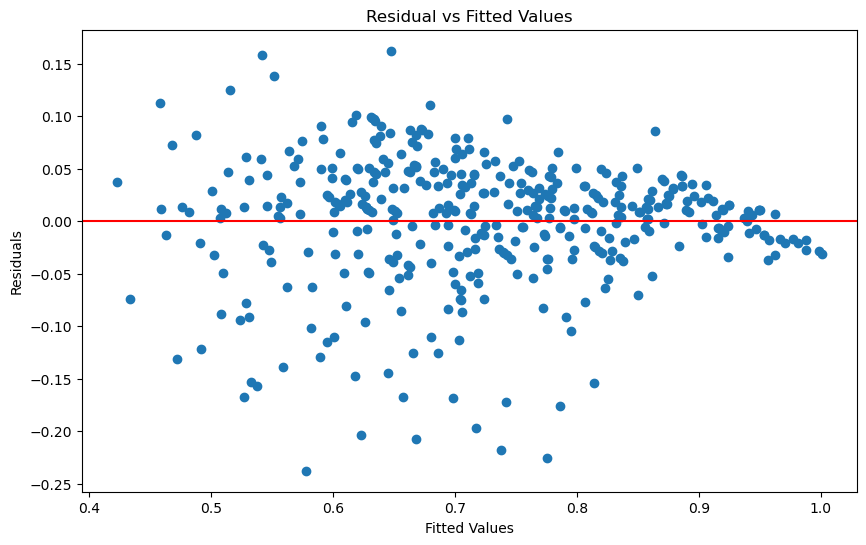

In [41]:
# 3. Linearity of Variables
# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(sm_model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual vs Fitted Values')
plt.show()

In the Residual vs Fitted Values plot, the residuals seem to be randomly scattered around the horizontal line at zero, with no clear pattern. This suggests that the assumption of linearity is reasonably met.

#### 4.4 Test for Homoscedasticity:

In [42]:
# Perform Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_test = sms.het_breuschpagan(residuals, X_train_sm)
bp_test_result = lzip(names, bp_test)

# Display the result of Breusch-Pagan test
bp_test_result

[('Lagrange multiplier statistic', 29.107680522569844),
 ('p-value', 5.80475963987606e-05),
 ('f-value', 5.140449057868244),
 ('f p-value', 4.211981609927699e-05)]

The result of the Breusch-Pagan test is as follows:

- **Lagrange multiplier statistic**: \(29.11\)
- **p-value**: \(5.80 \times 10^{-5}\)
- **F-value**: \(5.14\)
- **F p-value**: \(4.21 \times 10^{-5}\)

The p-values are below the common alpha level of 0.05, indicating that the null hypothesis of homoscedasticity is rejected. This suggests that the residuals do not have constant variance across levels of the independent variables.

#### 4.5. Normality of Residuals:

- **Histogram of Residuals**: The histogram suggests that the residuals are approximately normally distributed, as they roughly form a bell-shaped curve.
  
- **QQ-Plot**: In the QQ-plot, the points are mostly on the line, which indicates that the residuals are approximately normally distributed.

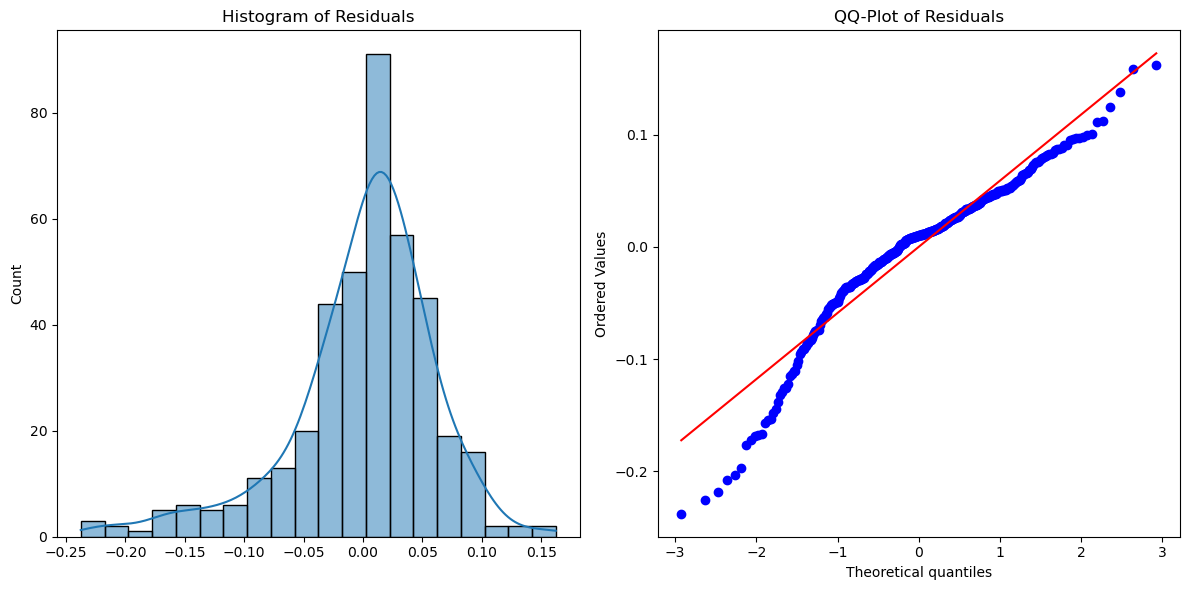

In [43]:
# 5. Normality of Residuals
# Plot histogram of residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, bins=20, kde=True)
plt.title('Histogram of Residuals')

# Plot QQ-plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-Plot of Residuals')

plt.tight_layout()
plt.show()

### Summary:

1. **Multicollinearity**: No significant multicollinearity was found after feature selection based on VIF scores.
2. **Mean of Residuals**: The mean of residuals is effectively zero.
3. **Linearity**: The residuals are randomly scattered around zero, meeting the linearity assumption.
4. **Homoscedasticity**: The Breusch-Pagan test suggests that the residuals do not have constant variance across the levels of independent variables (violated).
5. **Normality**: The residuals are approximately normally distributed.

### 5.Model performance evaluation

In [44]:
# Make predictions on train and test sets
y_train_pred = sm_model.predict(X_train_sm)
y_test_pred = sm_model.predict(X_test_sm)

# Calculate MAE, RMSE, R2, and Adj R2 for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1 - (1 - r2_train) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))

# Calculate MAE, RMSE, R2, and Adj R2 for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = 1 - (1 - r2_test) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

# Evaluate Ridge and Lasso models using MAE, RMSE, and R2
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
adj_r2_ridge = 1 - (1 - r2_ridge) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
adj_r2_lasso = 1 - (1 - r2_lasso) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

# Display the metrics
performance_metrics = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R2', 'Adj R2'],
    'Train_Base': [mae_train, rmse_train, r2_train, adj_r2_train],
    'Test_Base': [mae_test, rmse_test, r2_test, adj_r2_test],
    'Test_Ridge': [mae_ridge, rmse_ridge, r2_ridge, adj_r2_ridge],
    'Test_Lasso': [mae_lasso, rmse_lasso, r2_lasso, adj_r2_lasso]
})



performance_metrics

,Metric,Train_Base,Test_Base,Test_Ridge,Test_Lasso
0,MAE,0.043982,0.042036,0.042044,0.042787
1,RMSE,0.060704,0.059216,0.059194,0.061218
2,R2,0.813029,0.828534,0.828661,0.816741
3,Adj R2,0.810174,0.817471,0.817607,0.804918


***Both Ridge and Lasso regression models have similar R-Square values compared to the simple Linear Regression model. This suggests that the original model did not suffer significantly from overfitting, and the regularization did not lead to a substantial improvement in model performance.***

### 6. Actionable Insights & Recommendations


#### Significance of Predictor Variables:

1. **GRE Score and TOEFL Score**: These standardized test scores are significant predictors of admission chances. Universities should highlight the importance of these scores in their admission guidelines.
  
2. **CGPA**: Academic performance is a strong predictor. Students should be made aware that consistent academic performance is crucial for higher chances of admission.

3. **Research Experience**: Having research experience significantly improves the chance of admission. Universities could encourage undergraduate research to better prepare students for graduate studies.

#### Additional Data Sources for Model Improvement:

1. **Letters of Recommendation**: Textual analysis of recommendation letters could provide qualitative insights into a candidate’s suitability.

2. **Extracurricular Activities**: Data on a student's involvement in clubs, sports, or other non-academic activities could add another dimension to the prediction model.

3. **Internships and Work Experience**: Real-world experience could be a strong predictor of a student's ability to succeed in graduate programs.

#### Model Implementation in Real World:

1. **University Admission Offices**: This model could be used as a preliminary filter to rank applicants based on predicted chances of admission.

2. **Career Counselors**: The model could serve as a tool for counselors to provide data-backed advice to students.

3. **Students**: They can use the model to evaluate their own profiles and focus on improving key areas to increase their chances of admission.

#### Potential Business Benefits:

1. **Efficiency**: Automating the initial stages of the admission process can make it more efficient, allowing staff to focus on more complex tasks.

2. **Data-Driven Decision Making**: The model can provide universities with insights to refine their admission process and criteria.

3. **Personalized Student Engagement**: Universities could use the model to identify students who are a good fit but may be lacking in one area, and then engage with them through targeted programs or scholarships.

#### Key Differentiators for an Excellent Solution:

1. **Real-Time Prediction**: Integrating the model into a real-time system where students can get immediate feedback on their application strength.

2. **Continuous Improvement**: Regularly updating the model with new data can make it more accurate over time.

3. **Ethical Considerations**: Ensuring that the model does not inadvertently introduce or perpetuate bias in the admission process.

By addressing these points, the model can not only serve as a predictive tool but also as a strategic asset that offers multiple avenues for operational improvements and data-driven decision-making.

In [ ]:
# Mapping cluster centers to the original dataset
# First, create a DataFrame for the cluster centers
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=scaled_data.columns)

# Assigning the cluster label to each row in the original dataset
df_copy['Cluster'] = cluster_labels

# Mapping each row to its corresponding cluster center
mapped_cluster_centers = data_sample.apply(lambda row: cluster_centers_df.iloc[row['Cluster']], axis=1)

# Creating a new DataFrame with the original data and its corresponding cluster centers
mapped_data = pd.concat([data_sample.reset_index(drop=True), mapped_cluster_centers.reset_index(drop=True)], axis=1)

mapped_data.head()

# Please note that this code assumes 'kmeans' and 'cluster_labels' are already defined. If not, you will need to perform KMeans clustering on your data first.
